Reading classics [Python Machine Learning 3rd Edition](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch14/ch14_part3.ipynb)

In [1]:
%%writefile color_header.py
from IPython.display import display,HTML
from IPython.core.magic import register_line_magic
import random

@register_line_magic
def left_header(params):
    params=params.split('|'); string=params[0]
    if len(params)==1: font_size=24; font_family='Ewert'
    elif  len(params)==2: font_size=int(params[1]); font_family='Ewert' 
    else: font_size=int(params[1]); font_family=params[2]
    width=650; height=font_size*2.5
    randi=str(random.uniform(0,9999999))
    html_str="""
    <head><script src='https://d3js.org/d3.v6.min.js'></script>
    </head><style>@import 'https://fonts.googleapis.com/css?family="""+\
    font_family+"""&effect=3d'; #colorized1 {font-family:"""+font_family+\
    """; color:white; padding-left:10px; font-size:"""+str(font_size)+\
    """px;}</style><h1 id='colorized1' class='font-effect-3d'>"""+string+\
    """</h1><script>
    var tc=setInterval(function(){
        var now=new Date().getTime();
        var iddoc1=document.getElementById('colorized1');
        iddoc1.style.color=d3.interpolateSinebow(now/20000); },1)
    </script>"""
    file='d3header'+randi+'.html'
    with open(file,'w') as f:
         f.write(html_str); f.close()
    string="""<div id='html_string"""+randi+\
    """'><iframe src='"""+file+\
    """' height="""+str(height)+""" width="""+str(width)+\
    """ style='display:block;'></iframe></div>"""
    display(HTML(string))

Writing color_header.py


In [2]:
%run color_header.py
%left_header Code Modules & Functions|22|Orbitron

In [3]:
import warnings; warnings.filterwarnings('ignore')
import tensorflow as tf,pylab as pl
import pandas as pd,numpy as np,seaborn as sb
import tensorflow.keras.utils as tku
from tensorflow.data import Dataset as tfd
import sklearn.model_selection as sms
import tensorflow_datasets as tfds
import tensorflow.image as tfim
from IPython.display import display,HTML
from IPython.core.magic import register_line_magic
tfds.disable_progress_bar()

In [4]:
def phtml(str):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family=Aladin&effect=3d-float';      
    </style><h1 class='font-effect-3d-float' 
    style='font-family:Smokum; color:#11ff11; font-size:18px;'>
    %s</h1>"""%str))
def preprocess(item):
    image,label=item['image'],item['label']
    image=tfim.convert_image_dtype(image,tf.float32)
    image=tf.reshape(image,(-1,))
    return {'image-pixels':image},label[...,tf.newaxis]
def train_input_fn(buffer_size,batch_size):
    mnist_train=tfds.load(
        name='mnist',split='train[0%:90%]',shuffle_files=True)
    ds=mnist_train.map(preprocess)
    ds=ds.shuffle(buffer_size)
    ds=ds.batch(batch_size)
    return ds.repeat()
def valid_input_fn(batch_size):
    mnist_valid=tfds.load(
        name='mnist',split='train[90%:100%]',shuffle_files=True)
    ds=mnist_valid.map(preprocess)
    ds=ds.batch(batch_size)
    return ds
def test_input_fn(batch_size):
    datasets=tfds.load(name='mnist')
    mnist_test=datasets['test']
    ds=mnist_test.map(preprocess)
    ds=ds.batch(batch_size)
    return ds
@register_line_magic
def display_predict(n):
    n=int(n)
    fig=pl.figure(figsize=(10,8))
    randch=np.random.choice(batch_size,size=n,replace=False)
    for i,idx in enumerate(randch):
        ax=fig.add_subplot(3,n//3,i+1,xticks=[],yticks=[])
        ax.imshow(bx_test[idx].reshape(img_size,img_size),
                  cmap='rainbow')
        pred_idx=py_test[idx]; true_idx=by_test[idx]
        color=('#11ff11' if pred_idx==true_idx else '#ffee11')
        ax.set_title('{} \n({})'.format(pred_idx,true_idx),
                     color=color)
    pl.show()

In [5]:
%left_header Data Processing|22|Orbitron

In [6]:
buffer_size=1000; batch_size=64
img_size=28; num_epochs=20
steps_per_epoch=np.ceil(.9*60000/batch_size)
feature_column=tf.feature_column.numeric_column(
    key='image-pixels',shape=(img_size*img_size))

In [7]:
ds_test=test_input_fn(batch_size)
bx_test,by_test=[],[]
batch=next(iter(ds_test))
for j in range(batch_size):
    by_test.append(batch[1].numpy()[j][0])
    bx_test.append(batch[0]['image-pixels'].numpy()[j])

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


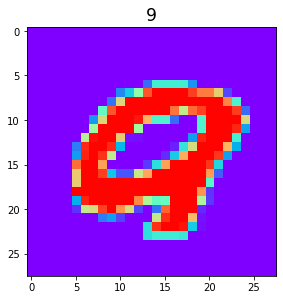

In [8]:
phtml('keys: %s'%batch[0].keys())
n=np.random.randint(0,batch_size,1)[0]
img=bx_test[n].reshape(img_size,img_size)
pl.imshow(img,cmap='rainbow'); pl.tight_layout();
pl.title(by_test[n],fontdict={'fontsize':'xx-large'});

In [9]:
%left_header DNN Classifiers|22|Orbitron

In [10]:
dnn_clf=tf.estimator.DNNClassifier(
    feature_columns=[feature_column],hidden_units=[96,32],
    n_classes=10,model_dir='models/mnist-dnn/');

In [11]:
#train without validation
#dnn_clf.train(
#    input_fn=lambda:train_input_fn(buffer_size,batch_size),
#    steps=num_epochs*steps_per_epoch);

In [12]:
#train with validation
tf.estimator.train_and_evaluate(
    dnn_clf,
    tf.estimator.TrainSpec(
        input_fn=lambda:train_input_fn(buffer_size,batch_size), 
        max_steps=num_epochs*steps_per_epoch),
    tf.estimator.EvalSpec(
        input_fn=lambda:valid_input_fn(batch_size)))

({'accuracy': 0.9188333,
  'average_loss': 0.29841745,
  'loss': 0.29799673,
  'global_step': 16880},
 [])

In [13]:
test_result=dnn_clf.evaluate(
    input_fn=lambda:test_input_fn(batch_size))
phtml(test_result)

In [14]:
%left_header Predictions|22|Orbitron

In [15]:
y_test_pred=dnn_clf.predict(
    input_fn=lambda:test_input_fn(batch_size))
py_test=[]
for i in range(10000):
    py_test.append(next(iter(y_test_pred))['class_ids'][0])

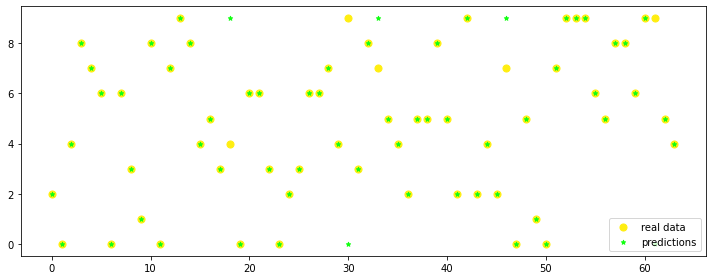

In [16]:
pl.figure(figsize=(10,4))
pl.scatter(
    range(batch_size),by_test,
    s=50,label='real data',c='#ffee11')
pl.scatter(
    range(batch_size),py_test[:batch_size],
    s=20,marker='*',label='predictions',c='#11ff11')
pl.tight_layout(); pl.legend();

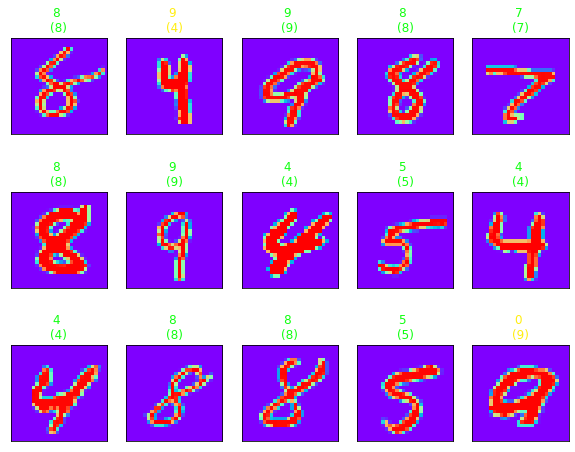

In [17]:
%display_predict 15